In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from postdocsalary.paths import DATA_DIR, ensure_dir, FIGURE_DIR
import urllib.request
pd.set_option('display.max_columns', None)
import plotly.express as px
from urllib.request import urlopen
import json

<ipython-input-2-e850b13296b8>:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### RPI map
- For each university

In [3]:
#statistical_areas_url = "https://github.com/loganpowell/census-geojson/blob/master/GeoJSON/20m/2017/metropolitan-statistical-area!micropolitan-statistical-area.json"
statistical_areas_url = "https://raw.githubusercontent.com/loganpowell/census-geojson/master/GeoJSON/20m/2017/metropolitan-statistical-area!micropolitan-statistical-area.json"

In [4]:
with urlopen(statistical_areas_url) as response:
    statistical_areas = json.load(response)

In [5]:
university_col = pd.read_pickle(DATA_DIR/ 'university_ranking_rpp.pickle')

In [6]:
university_col = university_col[university_col.RPP_all.isnull()==False]

In [7]:
university_col[:3]

World Rank                            Institution Country  National Rank  \
0         1.0                     Harvard University     USA            1.0   
1         2.0  Massachusetts Institute of Technology     USA            2.0   
2         3.0                    Stanford University     USA            3.0   

  Quality of Education Rank Alumni Employment Rank Quality of Faculty Rank  \
0                         1                      1                       1   
1                         4                     12                       2   
2                        10                      4                       3   

  Research Performance Rank  Score    UNITID  \
0                         1  100.0  166027.0   
1                         8   96.7  166683.0   
2                         2   95.1  243744.0   

                                  INSTNM       IALIAS  \
0                     Harvard University                
1  Massachusetts Institute of Technology  MIT, M.I.T.   
2                    Stanford University                

                      ADDR       CITY STABBR         ZIP  FIPS  OBEREG  \
0       Massachusetts Hall  Cambridge     MA       02138  25.0     1.0   
1  77 Massachusetts Avenue  Cambridge     MA  02139-4307  25.0     1.0   
2                            Stanford     CA       94305   6.0     8.0   

                  CHFNM   CHFTITLE     GENTELE          EIN  \
0     Lawrence S. Bacow  President  6174951000   42103580.0   
1        L. Rafael Reif  President  6172531000   42103594.0   
2  Marc Tessier-Lavigne  President  6507232300  941156365.0   

                            DUNS     OPEID  OPEFLAG            WEBADDR  \
0  082359691|149617367|047006379  215500.0      1.0   www.harvard.edu/   
1                      001425594  217800.0      1.0       web.mit.edu/   
2                      009214214  130500.0      1.0  www.stanford.edu/   

                         ADMINURL                            FAIDURL  \
0  college.harvard.edu/admissions  college.harvard.edu/financial-aid   
1      https://mitadmissions.org/               https://sfs.mit.edu/   
2         admission.stanford.edu/         financialaid.stanford.edu/   

                                             APPLURL  \
0  college.harvard.edu/admissions/application-pro...   
1                                        my.mit.edu/   
2                                     commonapp.org/   

                                            NPRICURL  \
0  college.harvard.edu/financial-aid/net-price-ca...   
1  https://sfs.mit.edu/undergraduate-students/our...   
2  www.stanford.edu/dept/finaid/undergrad/how/cal...   

                                              VETURL  \
0          sfs.harvard.edu/veteran-military-benefits   
1  https://sfs.mit.edu/undergraduate-students/typ...   
2              exploredegrees.stanford.edu/veterans/   

                                              ATHURL  \
0                                                      
1                                                      
2  parents.stanford.edu/2015/11/09/stanford-athle...   

                                             DISAURL  SECTOR  ICLEVEL  \
0                         accessibility.harvard.edu/     2.0      1.0   
1                            studentlife.mit.edu/das     2.0      1.0   
2  diversityandaccess.stanford.edu/disability-access     2.0      1.0   

   CONTROL  HLOFFER  UGOFFER  GROFFER  HDEGOFR1  DEGGRANT  HBCU  HOSPITAL  \
0      2.0      9.0      1.0      1.0      11.0       1.0   2.0       2.0   
1      2.0      9.0      1.0      1.0      12.0       1.0   2.0       2.0   
2      2.0      9.0      1.0      1.0      11.0       1.0   2.0       1.0   

   MEDICAL  TRIBAL  LOCALE  OPENPUBL ACT  NEWID  DEATHYR CLOSEDAT  CYACTIVE  \
0      1.0     2.0    12.0       1.0  A    -2.0     -2.0       -2       1.0   
1      2.0     2.0    12.0       1.0  A    -2.0     -2.0       -2       1.0   
2      1.0     2.0    21.0       1.0  A    -2.0     -2.0       -2       1.0 

In [26]:
len(university_col.CBSA.unique())

780

In [8]:
# set ID feature as the geographical region
for i, feat in enumerate(statistical_areas["features"]):
    statistical_areas["features"][i]["id"] = feat["properties"]['GEOID']

In [9]:
import seaborn as sns

In [10]:
def floatstohex(rgb):
    '''Takes an RGB tuple or list and returns a hex RGB string.'''
    return f'#{int(rgb[0]*255):02x}{int(rgb[1]*255):02x}{int(rgb[2]*255):02x}'

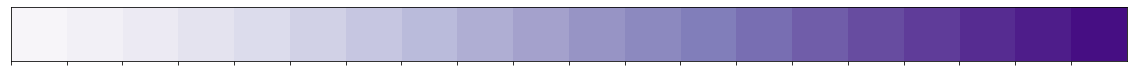

In [11]:
coolwarm = sns.color_palette('Purples', 20)
sns.palplot(coolwarm)

In [12]:
np.min(university_col.RPP_all.values), np.max(university_col.RPP_all.values)

(77.8, 134.5)

In [32]:
fig = px.choropleth(
    university_col,
    geojson=statistical_areas,
    locations="CBSA",
    color="RPP_all",
    color_continuous_scale=[floatstohex(i) for i in coolwarm],
    range_color=(78, 140),
    scope="usa",
    hover_name="CBSA_NAME",
    #labels={'CBSA_NAME':'CBSA_NAME'}
)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(dragmode=False)
fig.show()
fig.write_image(str(FIGURE_DIR / "map.pdf"))

In [14]:
university_col[:3]

World Rank                            Institution Country  National Rank  \
0         1.0                     Harvard University     USA            1.0   
1         2.0  Massachusetts Institute of Technology     USA            2.0   
2         3.0                    Stanford University     USA            3.0   

  Quality of Education Rank Alumni Employment Rank Quality of Faculty Rank  \
0                         1                      1                       1   
1                         4                     12                       2   
2                        10                      4                       3   

  Research Performance Rank  Score    UNITID  \
0                         1  100.0  166027.0   
1                         8   96.7  166683.0   
2                         2   95.1  243744.0   

                                  INSTNM       IALIAS  \
0                     Harvard University                
1  Massachusetts Institute of Technology  MIT, M.I.T.   
2                    Stanford University                

                      ADDR       CITY STABBR         ZIP  FIPS  OBEREG  \
0       Massachusetts Hall  Cambridge     MA       02138  25.0     1.0   
1  77 Massachusetts Avenue  Cambridge     MA  02139-4307  25.0     1.0   
2                            Stanford     CA       94305   6.0     8.0   

                  CHFNM   CHFTITLE     GENTELE          EIN  \
0     Lawrence S. Bacow  President  6174951000   42103580.0   
1        L. Rafael Reif  President  6172531000   42103594.0   
2  Marc Tessier-Lavigne  President  6507232300  941156365.0   

                            DUNS     OPEID  OPEFLAG            WEBADDR  \
0  082359691|149617367|047006379  215500.0      1.0   www.harvard.edu/   
1                      001425594  217800.0      1.0       web.mit.edu/   
2                      009214214  130500.0      1.0  www.stanford.edu/   

                         ADMINURL                            FAIDURL  \
0  college.harvard.edu/admissions  college.harvard.edu/financial-aid   
1      https://mitadmissions.org/               https://sfs.mit.edu/   
2         admission.stanford.edu/         financialaid.stanford.edu/   

                                             APPLURL  \
0  college.harvard.edu/admissions/application-pro...   
1                                        my.mit.edu/   
2                                     commonapp.org/   

                                            NPRICURL  \
0  college.harvard.edu/financial-aid/net-price-ca...   
1  https://sfs.mit.edu/undergraduate-students/our...   
2  www.stanford.edu/dept/finaid/undergrad/how/cal...   

                                              VETURL  \
0          sfs.harvard.edu/veteran-military-benefits   
1  https://sfs.mit.edu/undergraduate-students/typ...   
2              exploredegrees.stanford.edu/veterans/   

                                              ATHURL  \
0                                                      
1                                                      
2  parents.stanford.edu/2015/11/09/stanford-athle...   

                                             DISAURL  SECTOR  ICLEVEL  \
0                         accessibility.harvard.edu/     2.0      1.0   
1                            studentlife.mit.edu/das     2.0      1.0   
2  diversityandaccess.stanford.edu/disability-access     2.0      1.0   

   CONTROL  HLOFFER  UGOFFER  GROFFER  HDEGOFR1  DEGGRANT  HBCU  HOSPITAL  \
0      2.0      9.0      1.0      1.0      11.0       1.0   2.0       2.0   
1      2.0      9.0      1.0      1.0      12.0       1.0   2.0       2.0   
2      2.0      9.0      1.0      1.0      11.0       1.0   2.0       1.0   

   MEDICAL  TRIBAL  LOCALE  OPENPUBL ACT  NEWID  DEATHYR CLOSEDAT  CYACTIVE  \
0      1.0     2.0    12.0       1.0  A    -2.0     -2.0       -2       1.0   
1      2.0     2.0    12.0       1.0  A    -2.0     -2.0       -2       1.0   
2      1.0     2.0    21.0       1.0  A    -2.0     -2.0       -2       1.0 

In [15]:
cost_of_living_df = pd.read_csv(DATA_DIR / 'BEA_price_parity' / 'BEA-cost-of-living-comparison.csv', skiprows=4)

In [17]:
len(cost_of_living_df)

1549

In [18]:
RPP_df = cost_of_living_df[cost_of_living_df.Description == "RPPs: All items"][["GeoFips", "GeoName", "2019"]]
RPP_df['CBSA'] = RPP_df.GeoFips
RPP_df[:5]

GeoFips                                      GeoName   2019   CBSA
0    00000                                United States  100.0  00000
4    00999   United States (Nonmetropolitan Portion) 1/   86.8  00999
8    10180  Abilene, TX (Metropolitan Statistical Area)   90.3  10180
12   10420    Akron, OH (Metropolitan Statistical Area)   90.0  10420
16   10500   Albany, GA (Metropolitan Statistical Area)   82.8  10500

In [31]:
[i for i in RPP_df.GeoName.values if ' WY' in i]

['Casper, WY (Metropolitan Statistical Area)',
 'Cheyenne, WY (Metropolitan Statistical Area)']

In [19]:
len(RPP_df)

386

In [33]:

fig = px.choropleth(
    RPP_df,
    geojson=statistical_areas,
    locations="CBSA",
    color="2019",
    color_continuous_scale=[floatstohex(i) for i in coolwarm],
    range_color=(78, 140),
    scope="usa",
    hover_name="GeoName",
    #labels={'CBSA_NAME':'CBSA_NAME'}
)

fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(dragmode=False)
fig.show()
fig.write_image(str(FIGURE_DIR / "map_jan13.pdf"))